In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt
from Bio import Phylo
#import dendropy

%matplotlib inline

In [2]:
ebola_tree = Phylo.read('my_ebola.nex', 'nexus')
ebola_tree.name = 'Ebolavirus tree'
ebola_simple_tree = Phylo.read('ebola_simple.nex', 'nexus')
ebola_simple_tree.name = 'Ebolavirus simplified tree'

In [3]:
Phylo.draw_ascii(ebola_simple_tree)
Phylo.draw_ascii(ebola_tree)

 , BDBV
 |
 | BDBV
_|
 , BDBV
 |
 , BDBV
 |
 , BDBV
 |
 |               ______________ TAFV
 |              |
 |______________|                       ____________________________ SUDV
                |            __________|
                |           |          |_________________________ RESTV
                |___________|
                            |                  , EBOV2014
                            |__________________|
                                               , EBOV2007
                                               |
                                               , EBOV1976
                                               |
                                               | EBOV1995

 , 'BDBV_KC545395 18891 bp'
 |
 |                                          , 'SUDV_EU338380 18891 bp'
 |                                          |
 |                                          , 'SUDV_KC242783 18891 bp'
 |                                          |
 |                        __

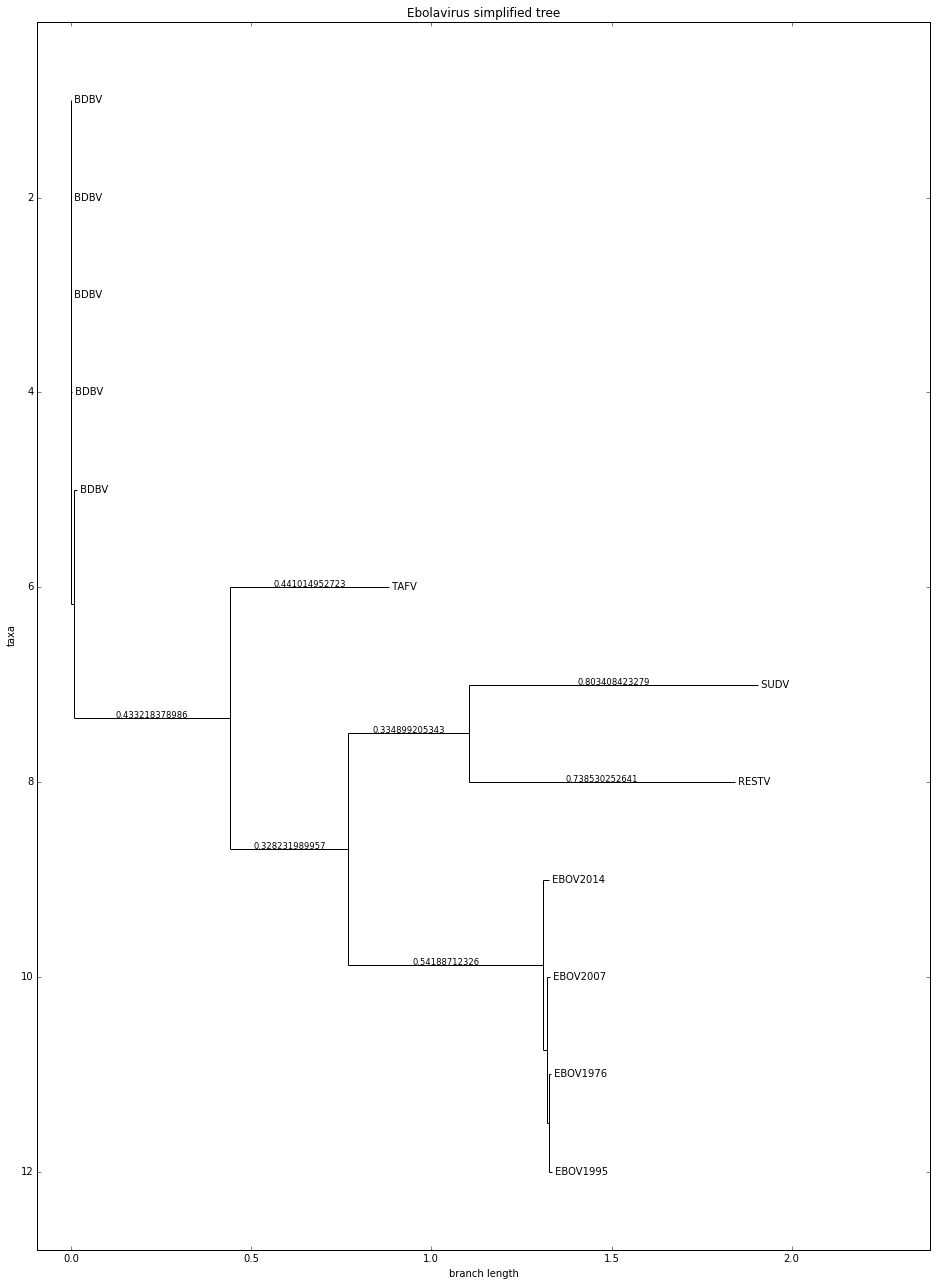

In [4]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
Phylo.draw(ebola_simple_tree, axes=ax, branch_labels=
           lambda c: c.branch_length if c.branch_length > 0.02 else None)

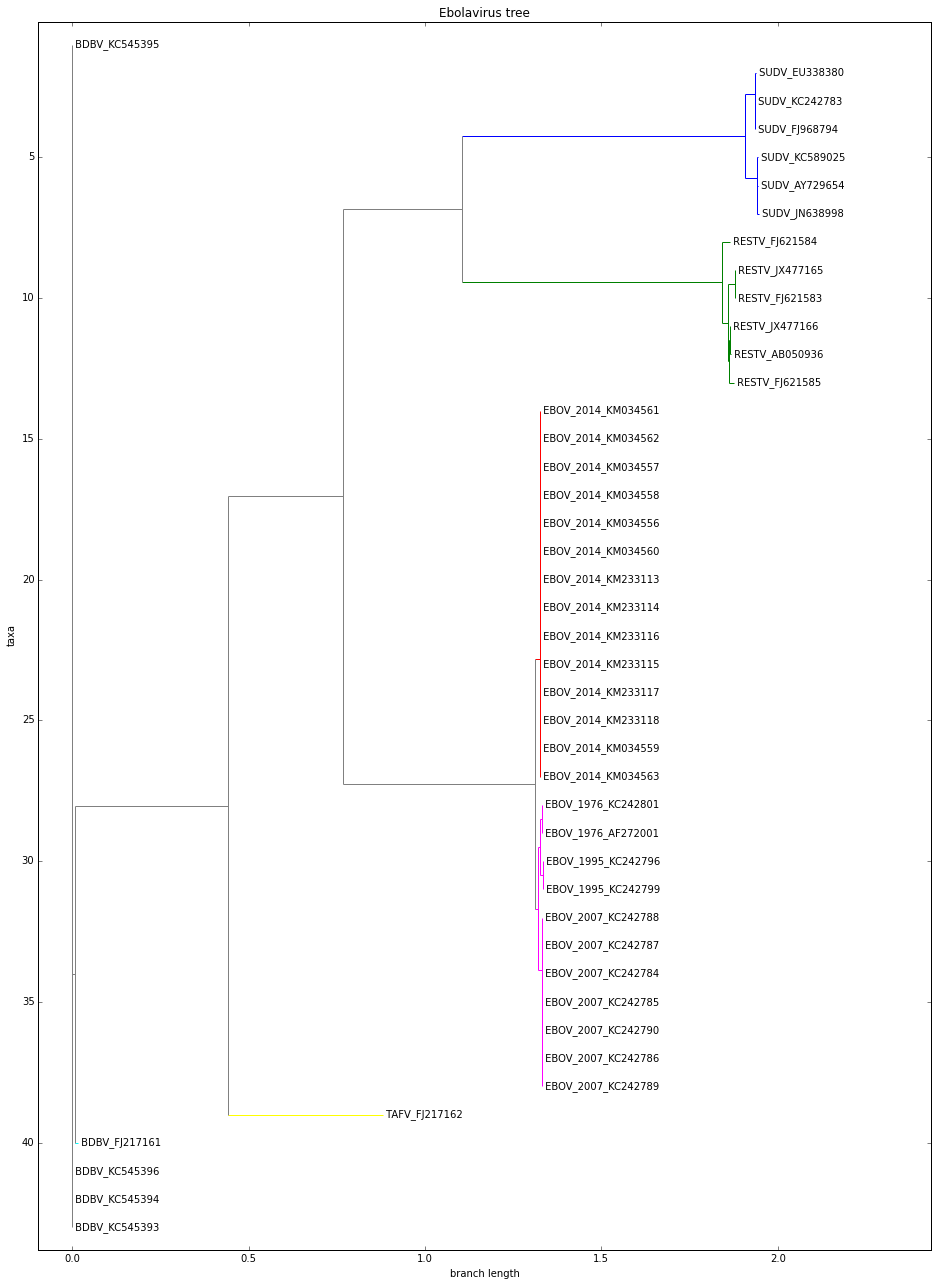

In [5]:
fig = plt.figure(figsize=(16, 22))
ax = fig.add_subplot(111)
from collections import OrderedDict
my_colors = OrderedDict({
'EBOV_2014': 'red',
'EBOV': 'magenta',
'BDBV': 'cyan',
'SUDV': 'blue',
'RESTV' : 'green',
'TAFV' : 'yellow'
})

def get_color(name):
    for pref, color in my_colors.items():
        if name.find(pref) > -1:
            return color
    return 'grey'

def color_tree(node, fun_color=get_color):
    if node.is_terminal():
        node.color = fun_color(node.name)
    else:
        my_children = set()
        for child in node.clades:
            color_tree(child, fun_color)
            my_children.add(child.color.to_hex())
        if len(my_children) == 1:
            node.color = child.color
        else:
            node.color = 'grey'

ebola_color_tree = deepcopy(ebola_tree)
color_tree(ebola_color_tree.root)
Phylo.draw(ebola_color_tree, axes=ax, label_func=
           lambda x: x.name.split(' ')[0][1:] if x.name is not None else None)

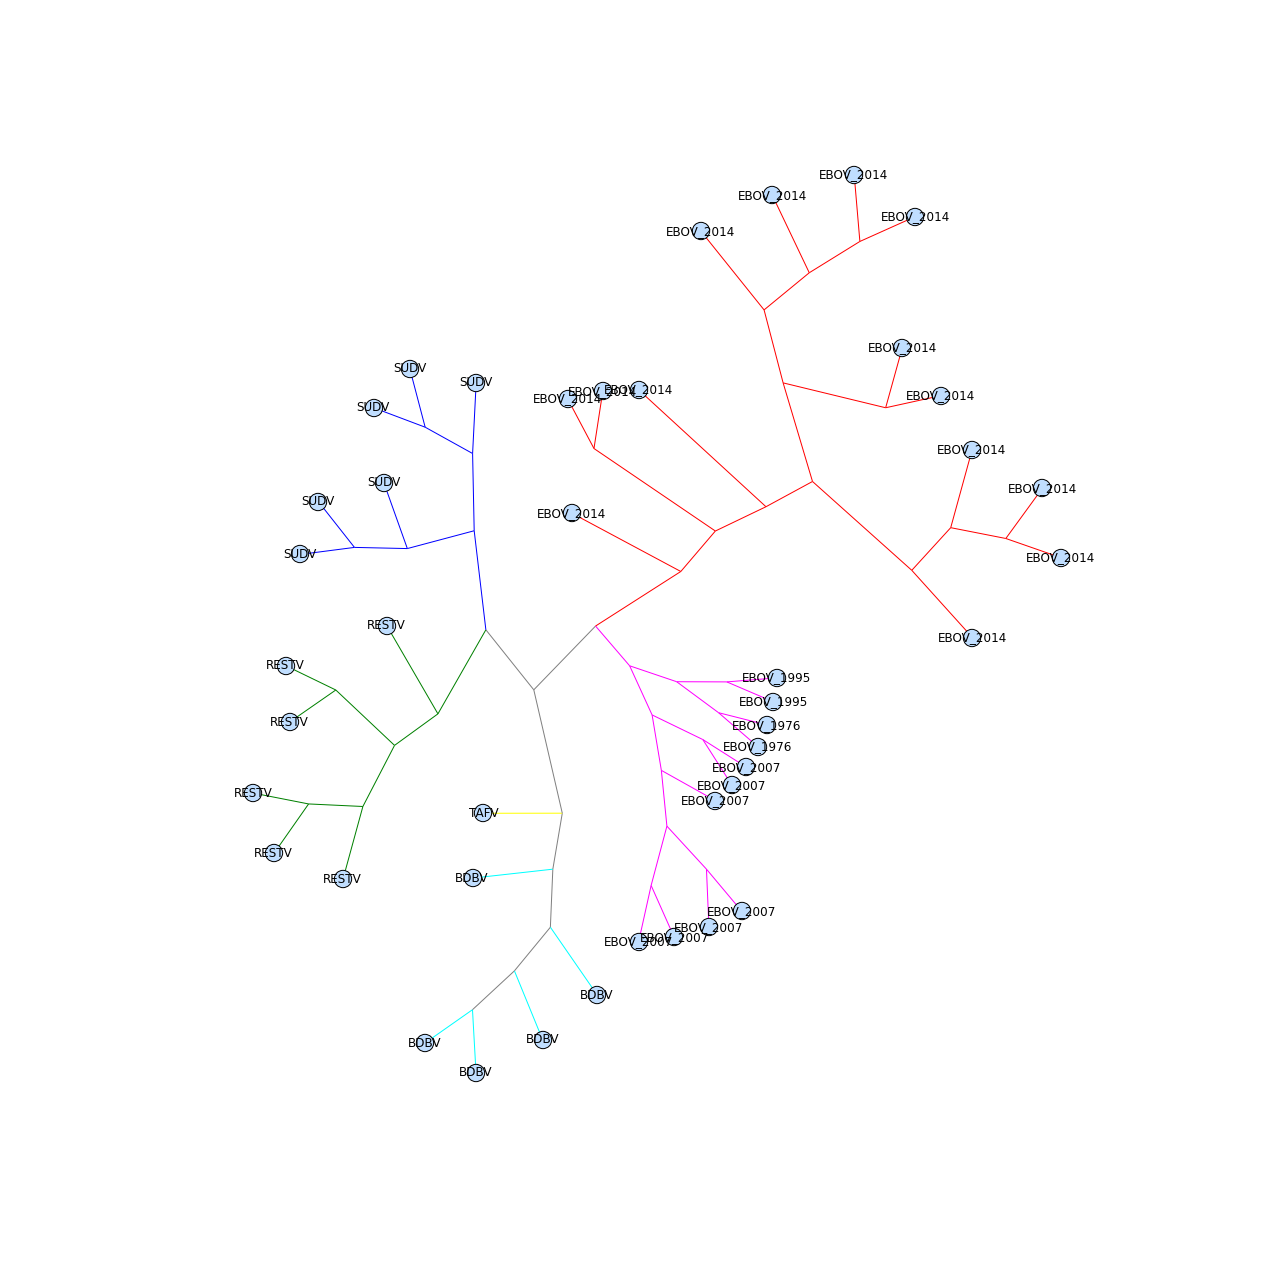

In [7]:
fig = plt.figure(figsize=(22, 22))
ax = fig.add_subplot(111)

def simplify_name(n):
    if n.is_terminal:
        return n.name[1:n.name.rfind('_')]
    else:
        return None
    
color_tree(ebola_tree.root, fun_color=get_color)
Phylo.draw_graphviz(ebola_tree, label_func=simplify_name, axes=ax)